# 1. Install, Imports, Settings

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'

# 2. Load data

In [5]:
df = pd.read_csv("data/clean_NNAJ_Departaments_actors.csv", sep='|')
df.head()

,clean_NNAJ_actors,Departamento,Filename,Year,categoria,place,LOC,lat,lon,period
0,Grupo Armado Ilegal,Nariño,AT N° 004-18 NAR-Tumaco.pdf,2018,NaN,Tumaco,"Tumaco, Nariño",1.787434,-78.791265,Post-Agreement (2017-2022)
1,Fuerzas Armadas Revolucionarias - Ejército Del...,Nariño,AT N° 004-18 NAR-Tumaco.pdf,2018,Guerrillas,Tumaco,"Tumaco, Nariño",1.787434,-78.791265,Post-Agreement (2017-2022)
2,Grupos Armados Ilegales,Nariño,AT N° 004-18 NAR-Tumaco.pdf,2018,NaN,Tumaco,"Tumaco, Nariño",1.787434,-78.791265,Post-Agreement (2017-2022)
3,Delincuencia Organizada,Nariño,AT N° 004-18 NAR-Tumaco.pdf,2018,NaN,Tumaco,"Tumaco, Nariño",1.787434,-78.791265,Post-Agreement (2017-2022)
4,Fuerzas Armadas Revolucionarias - Ejército Del...,Nariño,AT N° 004-18 NAR-Tumaco.pdf,2018,Guerrillas,Tumaco,"Tumaco, Nariño",1.787434,-78.791265,Post-Agreement (2017-2022)


# 3. Number of NNAJ Early Warnings by Departamento

In [12]:
dft = df.groupby(["Departamento", "period"])['Filename'].nunique().to_frame()
dft = dft.reset_index()
dft = pd.pivot_table(dft, values='Filename', index=['Departamento'],
                    columns=['period'], aggfunc=np.sum)
dft = dft.fillna(0)
dft["Total"] = dft.sum(axis=1)
dft

period,Conflict & 2005-Justice and Peace (2001-2005),Conflict (2006-2011),"Havana Peace Negotiations, Peace Agreement (2012-2016)",Post-Agreement (2017-2022),Total
Departamento,,,,,
Amazonas,0.0,0.0,1.0,2.0,3.0
Antioquia,0.0,7.0,5.0,28.0,40.0
Arauca,2.0,9.0,11.0,8.0,30.0
Atlántico,0.0,3.0,1.0,3.0,7.0
Bogotá,0.0,2.0,4.0,8.0,14.0
Bolívar,2.0,5.0,14.0,18.0,39.0
Boyacá,1.0,0.0,3.0,3.0,7.0
Caldas,2.0,2.0,1.0,3.0,8.0
Caquetá,1.0,7.0,3.0,5.0,16.0


Text(0, 0.5, '')

<Figure size 720x432 with 0 Axes>

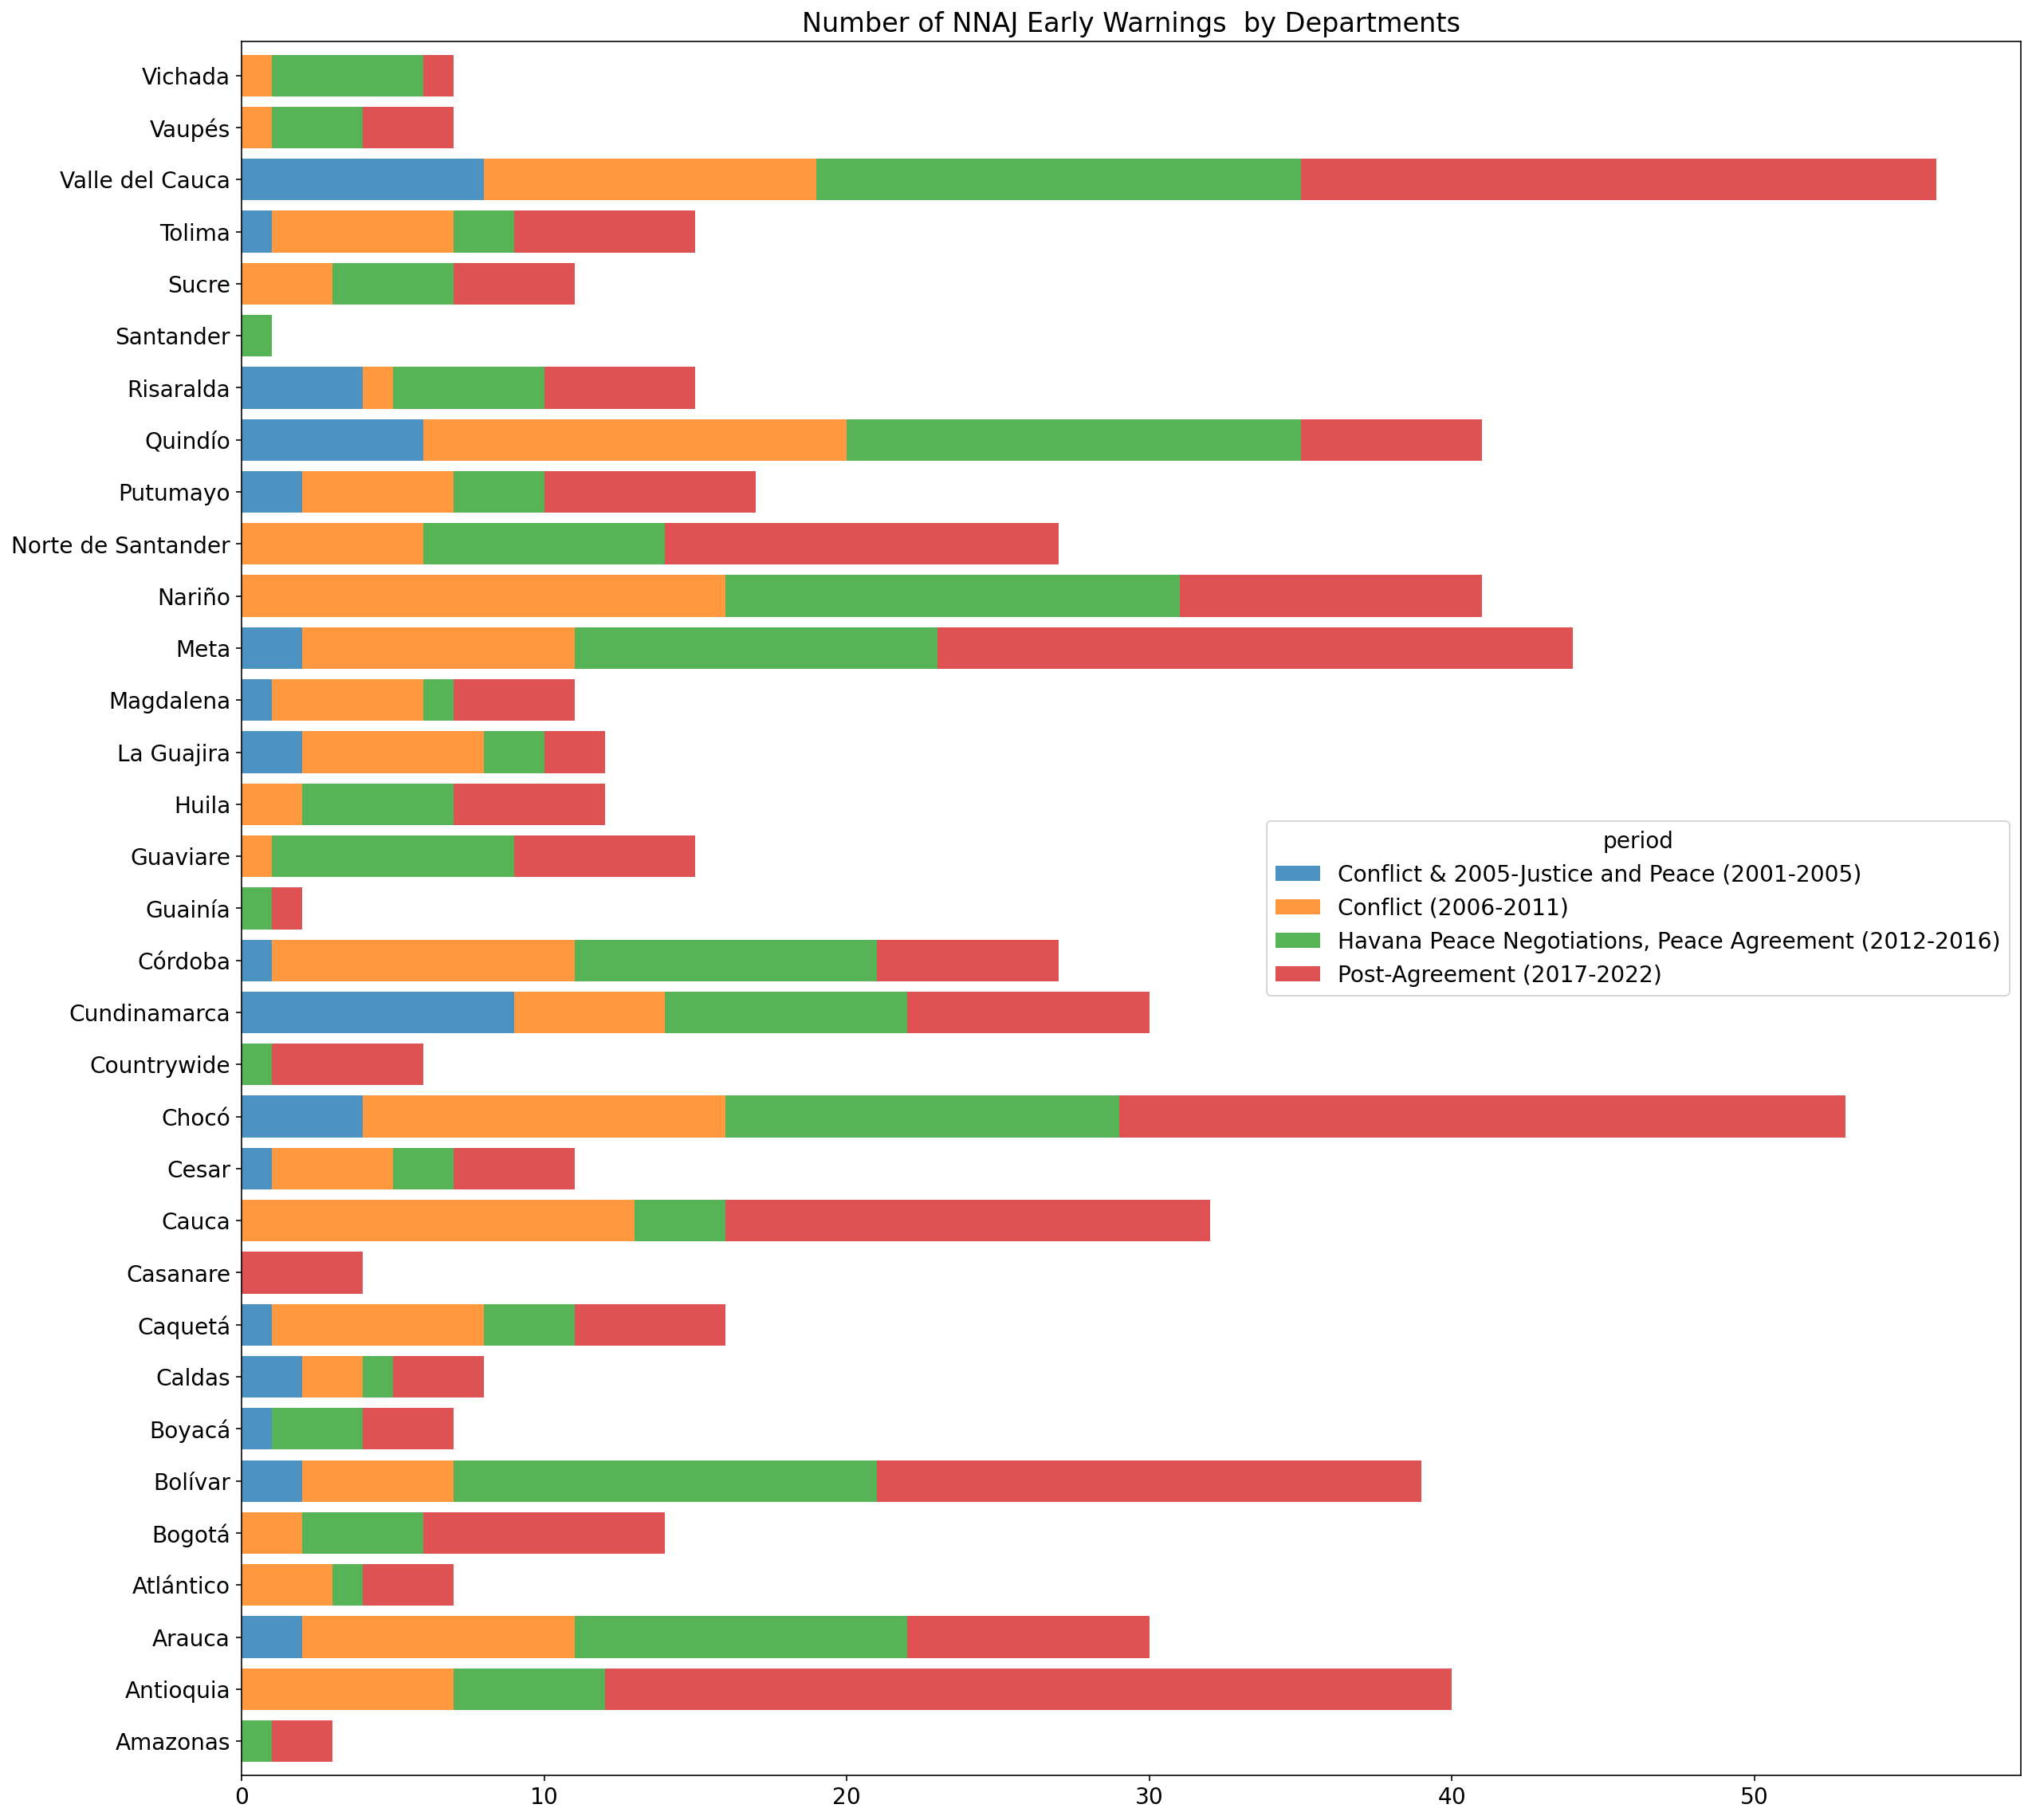

In [15]:
plt.figure()
plt.rcParams.update({'font.size': 14})

dft.drop("Total", axis=1).plot(kind="barh", figsize=(20, 20), stacked=True, width=0.8, alpha=0.8, rot=0)
plt.title("Number of NNAJ Early Warnings  by Departments")
plt.xlabel("")
plt.ylabel("")

# 4 Total of Early Warnings by Department - Descending Order

In [16]:
dft['Total'].sort_values(ascending = False).to_frame()

,Total
Departamento,
Valle del Cauca,56.0
Chocó,53.0
Meta,44.0
Quindío,41.0
Nariño,41.0
Antioquia,40.0
Bolívar,39.0
Cauca,32.0
Arauca,30.0


# 7. Documents distributed by Department - Timeline

### Las lineas verticales dividen los periodos de estudio que establecimos en la metodologia del paper. 

In [20]:
dftd = df.groupby(["Departamento", "Year"])['Filename'].nunique().to_frame()
dftd = dftd.reset_index()
dftd = pd.pivot_table(dftd, values='Filename', index=['Departamento'],
                    columns=['Year'], aggfunc=np.sum)
dftd = dftd.fillna(0)
dftd["Total"] = dftd.sum(axis=1)

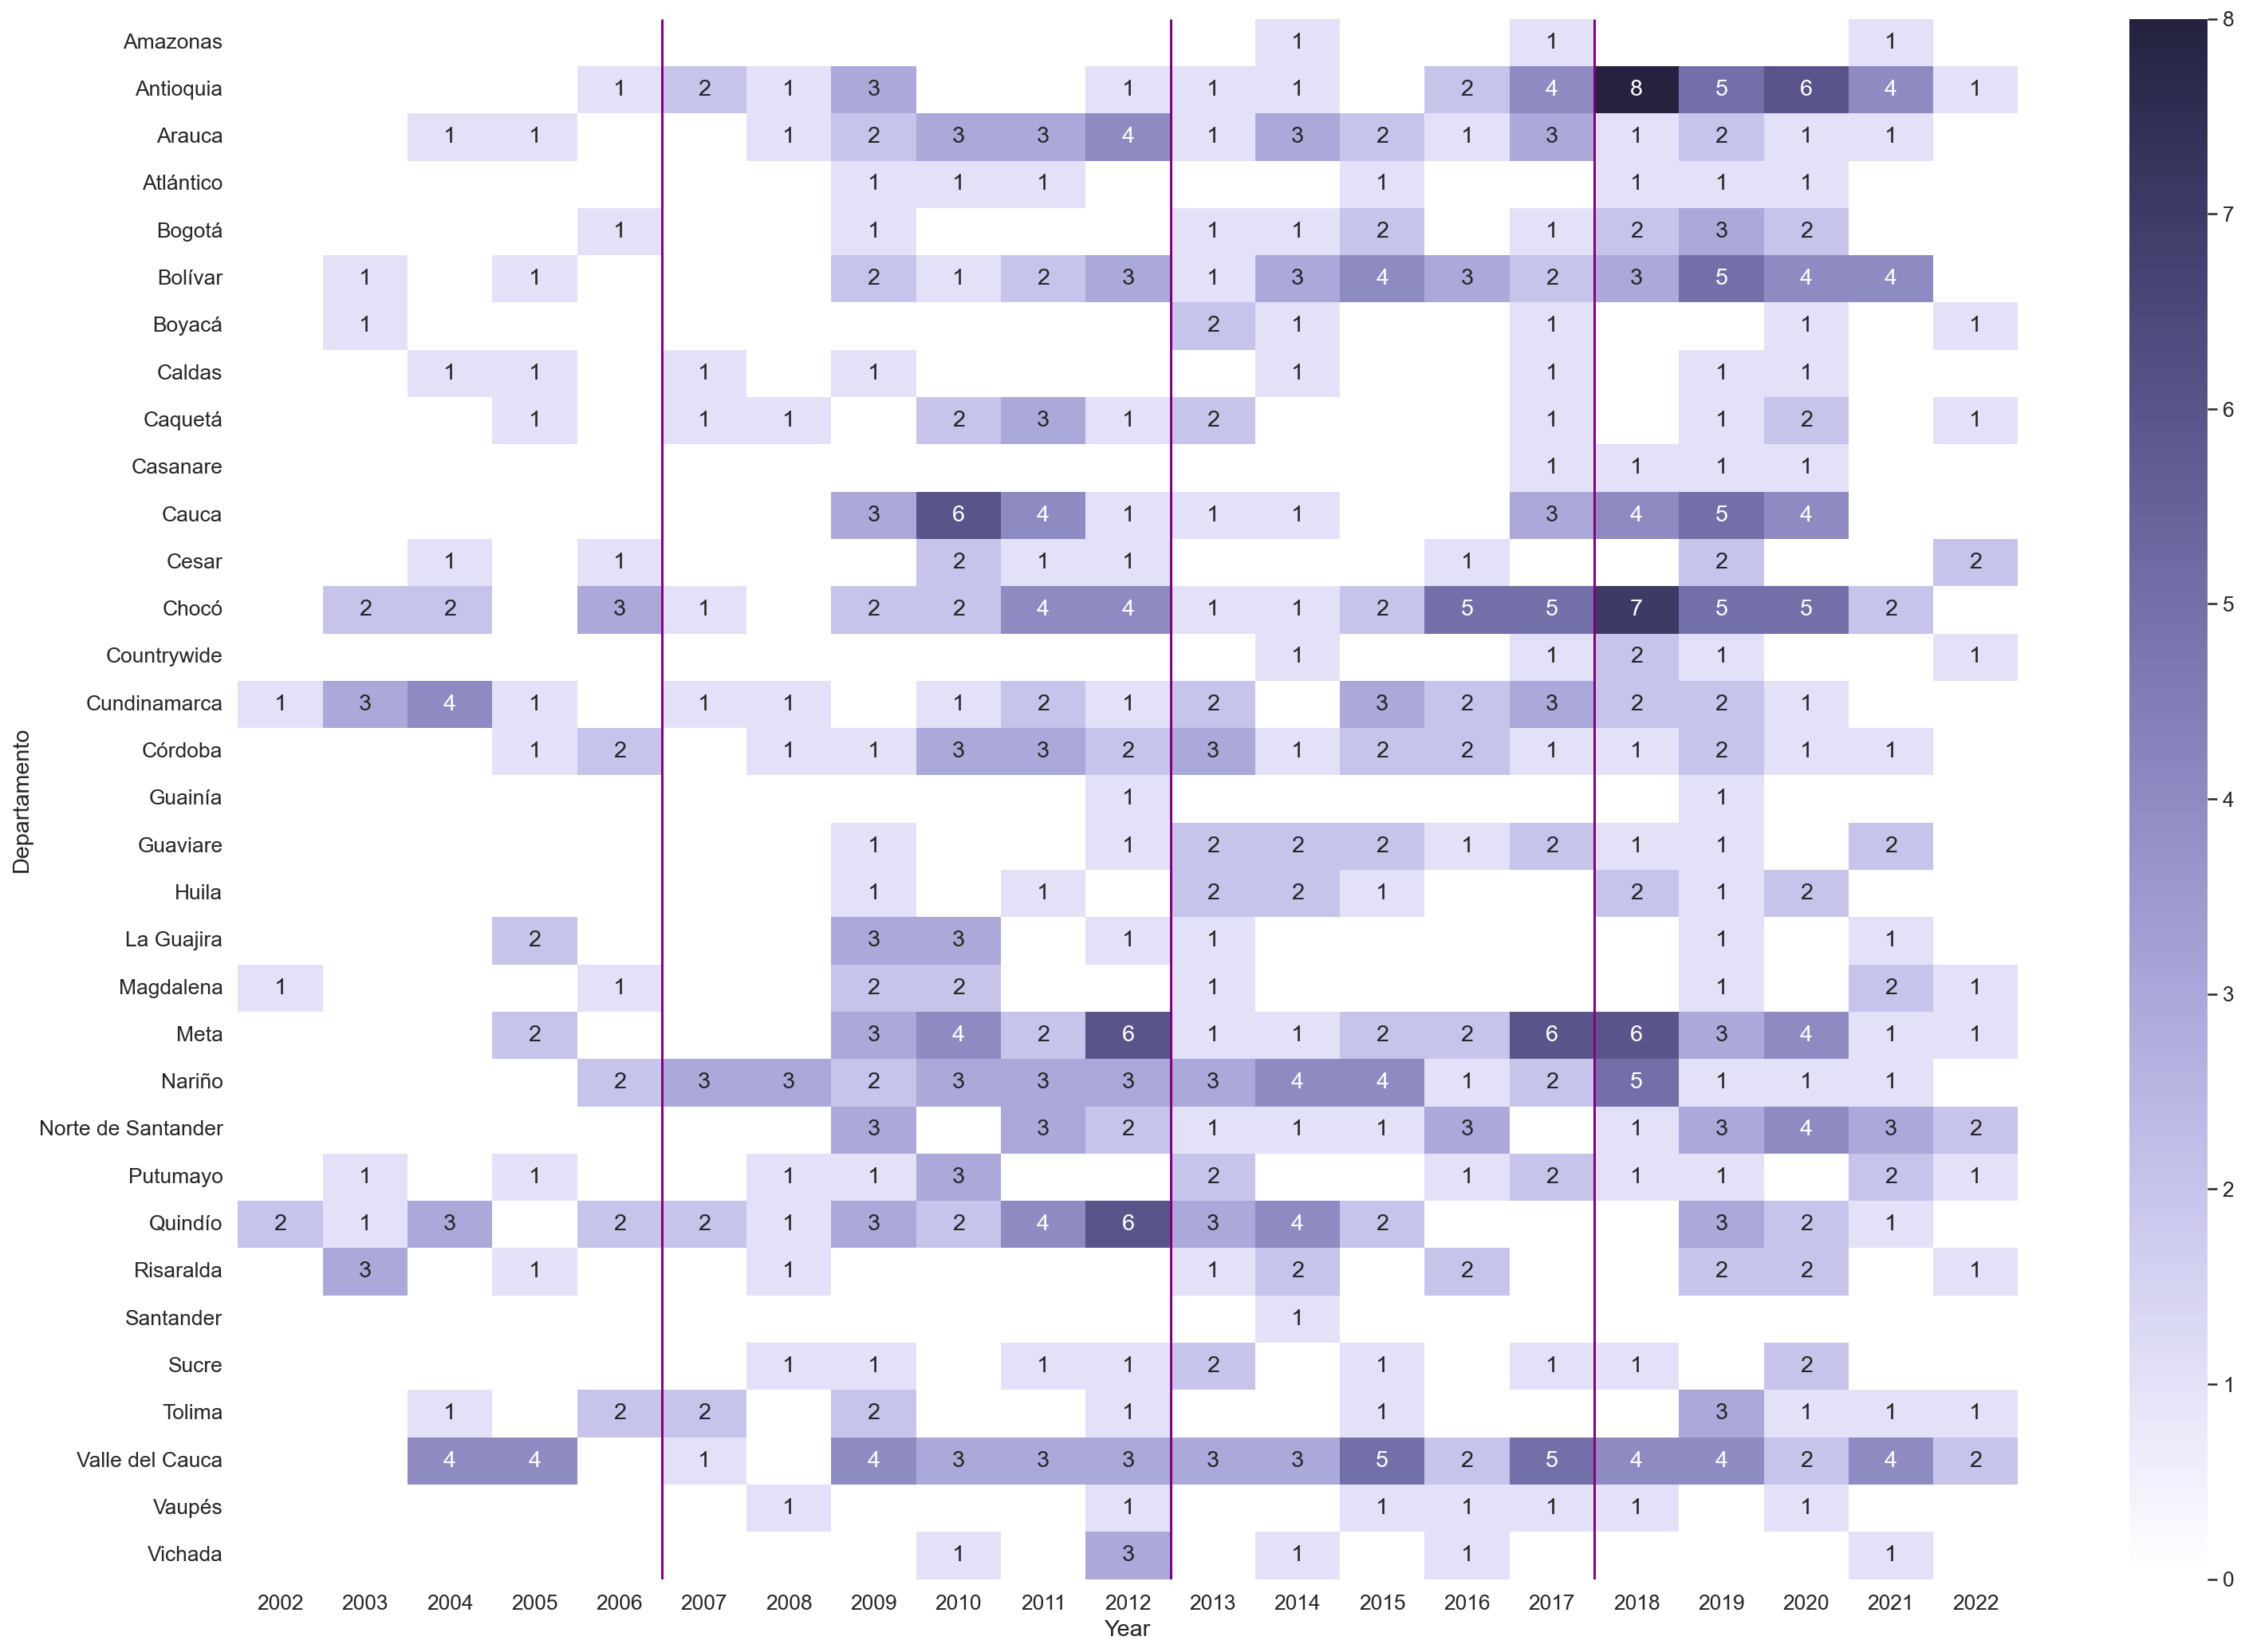

In [21]:
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
palette = sns.cubehelix_palette(n_colors= 7, rot=0, dark=0.15, light=1, as_cmap=True)

plt.figure(figsize=(25, 18))
ax = sns.heatmap(dftd.drop("Total", axis=1), annot=True, linewidth=0, cmap=palette)

for text in ax.texts:
    if text.get_text() == '0':
        text.set_text('')
        
ax.vlines([5, 11, 16],  ymin = 0, ymax = 45,
           colors = 'purple',
          linestyle='solid'
           )
cbar = ax.collections[0].colorbar

plt.show()

# Mapa de alertas NNAJ 

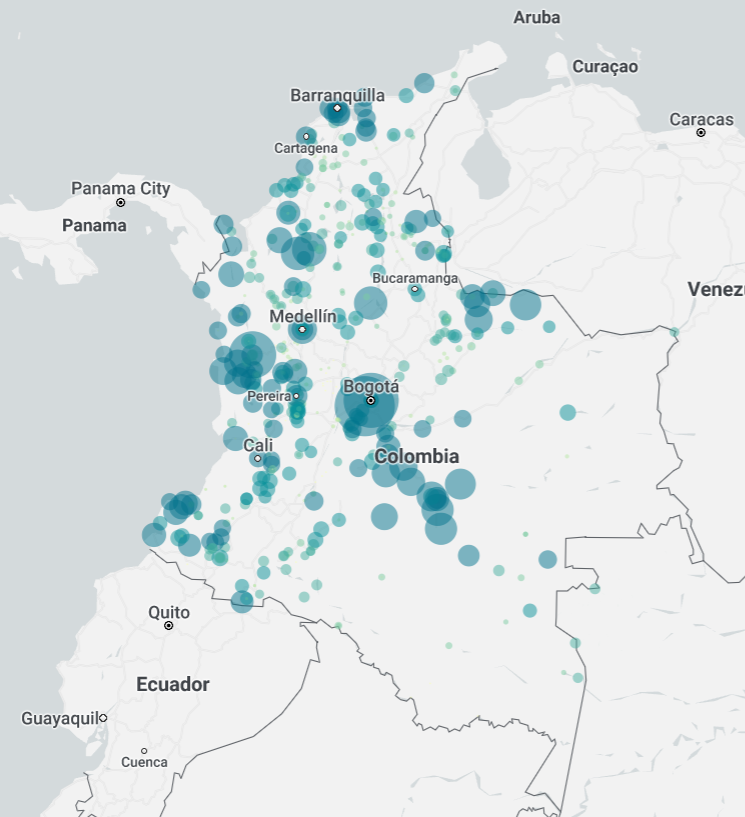

# 2001-2005

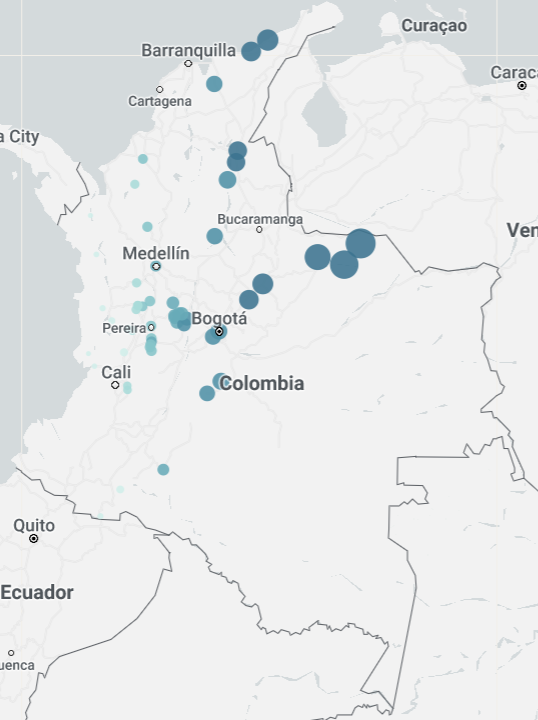

# 2006-2011

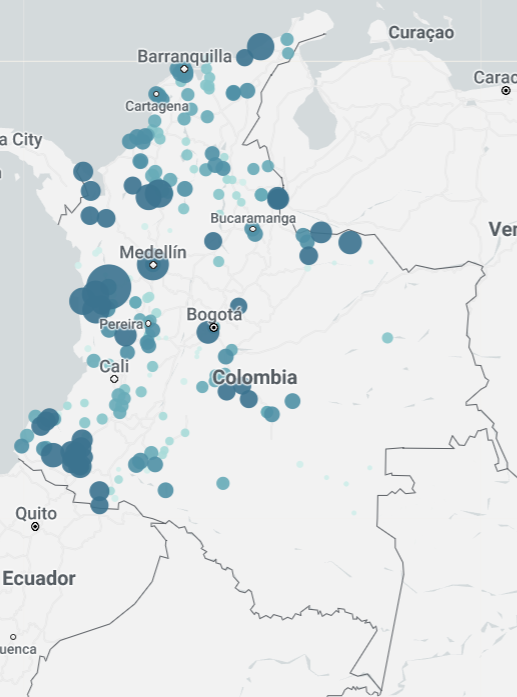

# 2012 - 2016

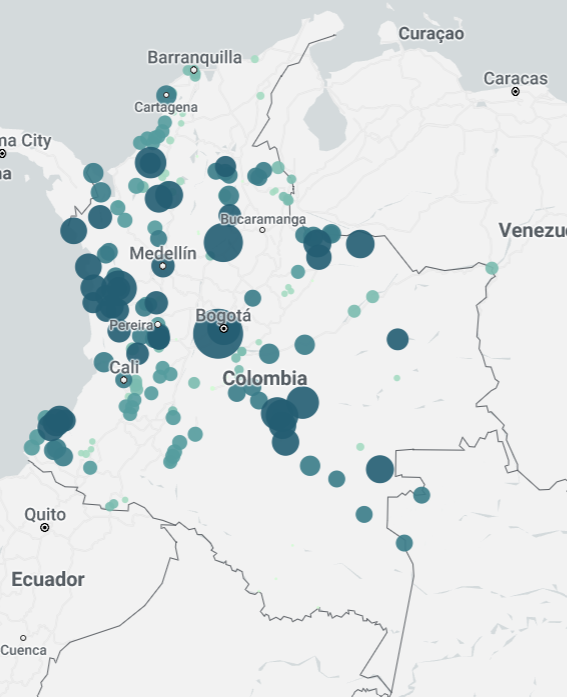

# 2007 - 2022

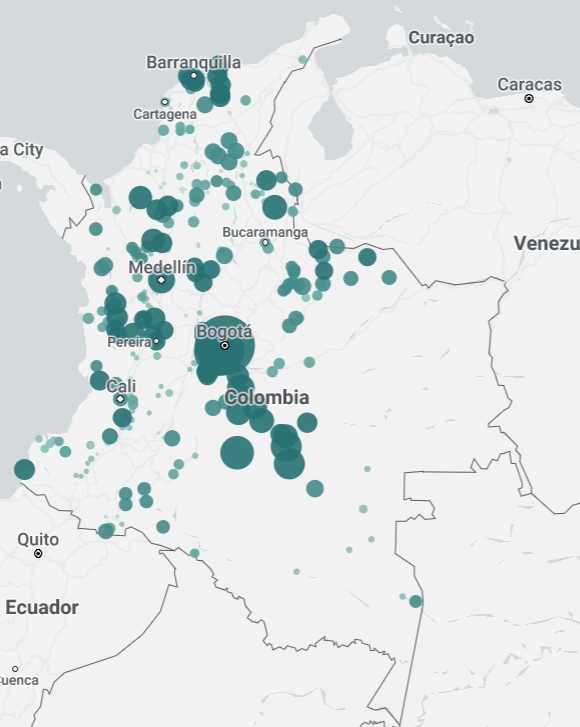


# 7. Export HTML

In [27]:
!jupyter nbconvert --to html 19_Distribution_of_NNAJ_Departaments.ipynb

[NbConvertApp] Converting notebook 19_Distribution_of_NNAJ_Departaments.ipynb to html
[NbConvertApp] Writing 2039025 bytes to 19_Distribution_of_NNAJ_Departaments.html
